In [111]:
import statistical_analysis_toolkit as stat_tools
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#que up some data
data = pd.DataFrame.from_dict({"fired":[34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56],
                               'not_fired':[27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54]}
                              , orient='index').T
#expected to have two columns (one for each sample, col_names = feature_names)
#null hyp (equal means)
h0 = 0.0
#95% CL
alpha = 0.05
analysis = stat_tools.analyze_distribution(data, alpha=alpha, h0=h0)
p_val = analysis.loc['POOLED'].p_value_t_test
evidence = stat_tools.strength_of_evidence(p_val)
print(f'Base on a p-value of {p_val} there is {evidence} evidence against H0={h0}')
analysis

In [ ]:
#n = stat_tools.critical_norm(.01)
df = 8
a = 0.05
t = stat_tools.critical_t(a, df) #two sided
t1 = stats.t.ppf(a, df) #one sided, lower
[t, t1]



In [ ]:
p = stat_tools.p_value_from_t(-2.54, 8, sides=1) #normal distribution - add t-distribution as well?


In [ ]:
data = pd.read_csv('C:\SMU\Stats\Homework\HW4\EducationData.csv')
data = pd.DataFrame.from_dict({'12 Years':data[data.Educ == 12].Income2005,
                              '16 Years':data[data.Educ == 16].Income2005}, orient='index').T

#expected to have two columns (one for each sample, col_names = feature_names)
#null hyp (equal means)
h0 = 0.0
#95% CL
alpha = 0.05
analysis = stat_tools.analyze_distribution(data, alpha=alpha, h0=h0)
p_val = analysis.loc['POOLED'].p_value_t_test
evidence = stat_tools.strength_of_evidence(p_val)
print(f'Base on a p-value of {p_val} there is {evidence} evidence against H0={h0}')
analysis

In [ ]:
data = pd.read_csv('~/Documents/SMU/Stats/Homework/HW4/Autism.csv')[['After', 'Before']]


#expected to have two columns (one for each sample, col_names = feature_names)
#null hyp (equal means)
h0 = 0.0
#95% CL
alpha = 0.05
analysis = stat_tools.analyze_distribution(data, alpha=alpha, h0=h0, is_log_data=False)
p_val = analysis.loc['POOLED'].p_value_t_test
evidence = stat_tools.strength_of_evidence(p_val)
print(f'Base on a p-value of {p_val} there is {evidence} evidence against H0={h0}')
analysis

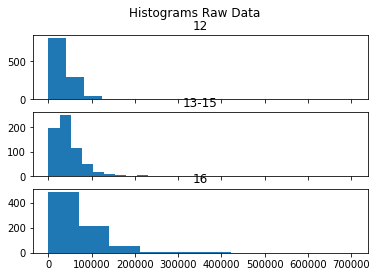

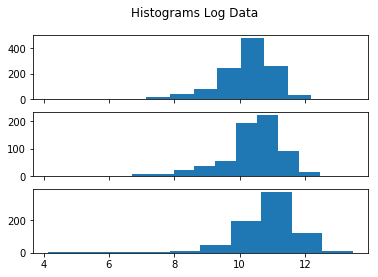

In [114]:
education_data = pd.read_csv('/Users/skennedy/Documents/SMU/Stats/Homework/HW5/ex0525.csv')[['Educ', 'Income2005']]
#education_data['LogIncome2005'] = np.log(education_data.Income2005)
education_data.Educ.replace('<12', '12', inplace=True)
education_data.Educ.replace('>16', '16', inplace=True)
education_data.to_csv('education_data.csv')
anova(education_data, 'Educ', 'Income2005')

#{   for education_level, data in education_data.groupby(['Educ'])}
    
#prep data for an anova test (one data frame with multiple columns as samples)


In [109]:
def anova(data, partition_column, observable_column):
    #test assumptions of anova graphically and numerically
    
    '''1) Normality: Similar to t-tools hypothesis testing, ANOVA is robust to this assumption.  
        Extremely long-tailed distributions (outliers) or skewed distributions, 
        coupled with different sample sizes (especially when the sample sizes are small) 
        present the only serious distributional problems.'''
    
    '''2) Equal Standard Deviations: This assumption is crucial, paramount, and VERY important.''' 
    
    '''3) The assumptions of independence within and across groups are critical.  
            If lacking, different analysis should be attempted.'''

    #Create logical groupings
    groups = data.groupby([partition_column])
    hist_fig, hist_ax = plt.subplots(len(groups), 1, sharex=True)
    hist_fig.suptitle('Histograms Raw Data')
    hist_fig_log, hist_ax_log = plt.subplots(len(groups), 1, sharex=True)
    hist_fig_log.suptitle('Histograms Log Data')
    i = 0
    group_stats = []
    for group_key, group in groups:
        clean_data  = group[observable_column].dropna()
        group_std = clean_data.std()
        group_mean = clean_data.mean()
        
        #plot histograms
        hist_ax[i].hist(clean_data)
        hist_ax[i].set_title(group_key)
        log_data = np.log(clean_data[clean_data != 0])
        hist_ax_log[i].hist(log_data)
     
        
        i = i + 1
    
    
    